In [1]:
from calitp.tables import tbl
from siuba import *
from siuba.sql import sql_raw
from siuba.experimental import completer
from plotnine import *

## How many agencies had a feed_end_date in the past? In the future?

In [2]:
tbl_expired_feeds = (tbl.gtfs_schedule.feed_info()                   
 >> mutate(feed_end_date_parsed = sql_raw('PARSE_DATE("%Y%m%d", feed_end_date)'))
 >> mutate( feed_date_ended = _.feed_end_date_parsed < "2021-07-01") 
 >> count(_.feed_date_ended, _.feed_end_date_parsed, _.calitp_itp_id)
 >> collect()
 >> mutate(feed_end_date_parsed = _.feed_end_date_parsed.astype("datetime64[ns]"))
)

In [14]:
tbl_expired_feeds >> filter(_.feed_end_date_parsed == _.feed_end_date_parsed.max()) 

,feed_date_ended,feed_end_date_parsed,calitp_itp_id,n
19,False,2029-12-31,281,1


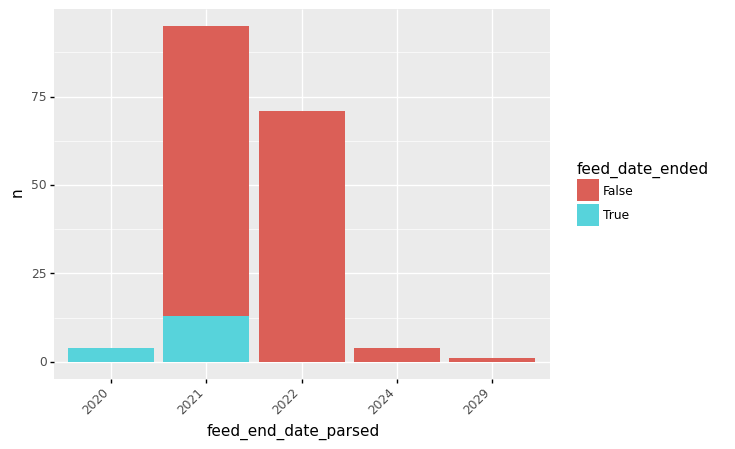

<ggplot: (307001335)>

In [3]:
(tbl_expired_feeds
 >> filter(_.feed_end_date_parsed.notna())
 >> mutate (
     feed_end_date_parsed = _.feed_end_date_parsed.dt.year.astype(str))
 >> ggplot(aes("feed_end_date_parsed", "n", fill= "feed_date_ended"))+geom_col() + theme(axis_text_x = element_text(angle=45, hjust=1))
 )
#missing years are not plotted

What is the furthest future date in feed_info_end? How many feeds share this?
* 2029, 1 
 


In [10]:
tbl.gtfs_schedule.feed_info() >> count(_.feed_publisher_name) >> collect()


,feed_publisher_name,n
0,"Trillium Solutions, Inc.",133
1,511 SF Bay,15
2,GMV Syncromatics,5
3,Transnnovation,3
4,MST,2
5,Big Blue Bus,2
6,Long Beach Transit,2
7,Transnnovation Inc,2
8,Los Angeles County Metropolitan Transportation...,2
9,MTS,1


In [ ]:
tbl_feed_publishers = 
  

In [5]:
tbl_expired_feeds

,feed_date_ended,feed_end_date_parsed,calitp_itp_id,n
0,False,2021-07-01,2,3
1,False,2021-12-31,6,2
2,False,2021-12-31,350,2
3,False,2021-07-31,310,2
4,False,2021-12-31,110,2
...,...,...,...,...
170,False,2022-03-01,2,1
171,False,2021-08-16,247,1
172,False,2021-08-28,273,1
173,False,2021-08-01,116,1


In [6]:
tbl_expired_agencies = (
    tbl_expired_feeds
    >> filter(_.feed_date_ended == True)
    >> right_join(_,tbl_agency_names_enddate, ["calitp_itp_id"])
    >> collect()
)

NameError: name 'tbl_agency_names_enddate' is not defined

In [ ]:
tbl_expired_agencies

In [ ]:
tbl_agency_names

In [ ]:
#tbl_agency_names_enddate = (
 #   tbl.views.gtfs_agency_names
#)

## What are the agency names?

In [ ]:
tbl_agency_names_end = (
    tbl.views.gtfs_agency_names()
    >> select(_.calitp_itp_id, _.agency_name)
    >> right_join(_, tbl_expired_feeds, ["calitp_itp_id"])
)

In [ ]:
tbl_expired_feeds

In [ ]:
tbl_agency_names_end

## What is the furthest future date in feed_info_end? How many share this date?

In [ ]:
tbl_expired_feeds >> arrange(-_.feed_end_date_parsed) >> head(10) >> ggplot(aes("feed_end_date_parsed.astype(str)", "n"))+geom_col() + theme(axis_text_x = element_text(angle=45, hjust=1)                                                                                                                                     )
#shows top 10 


In [ ]:
tbl_expired_feeds >> ggplot(aes("feed_end_date_parsed", "n"))+geom_col()

In [ ]:
tbl_expired_feed


## How many feeds have a start date that is more than one year into the past?

In [ ]:
tbl_start_feeds = (tbl.gtfs_schedule.feed_info()
 >> mutate(calitp_itp_id = _.calitp_itp_id)                 
 >> mutate(feed_start_date_parsed = sql_raw('PARSE_DATE("%Y%m%d", feed_start_date)'))
 >> mutate( past_feed_date_parsed = _.feed_start_date_parsed < "2020-07-01") 
 >> count(_.feed_start_date_parsed, _.calitp_itp_id)
 >> collect()
 >> mutate(feed_start_date_parsed = _.feed_start_date_parsed.astype("datetime64[ns]"))
)

In [ ]:
tbl_start_feeds

In [ ]:
tbl_start_feeds >> count(_.feed_start_date_parsed, sort = True)

In [ ]:
tbl_start_feeds >> arrange(_.feed_start_date_parsed)

## What is the average length of time between a feed_info_start and _end date

In [ ]:
tbl_average_feeds = (tbl.gtfs_schedule.feed_info() 
 >> mutate(feed_end_date_parsed = sql_raw('PARSE_DATE("%Y%m%d", feed_end_date)'))
 >> mutate(feed_start_date_parsed = sql_raw('PARSE_DATE("%Y%m%d", feed_start_date)'))                    
 # mutate(feed_average = _.feed_average[['feed_start_date_parsed', 'feed_end_date_parsed']].mean(axis=1))
 >> collect()
 >> mutate(feed_date_difference = ((_.feed_end_date_parsed - _.feed_start_date_parsed).dt.days/365))
 >> mutate(feed_end_date_parsed - _.f)
)

## What are the unique errors for each of a vendors clients?

In [ ]:
 tbl_unique_errors = (tbl.gtfs_schedule.feed_info())

In [ ]:
tbl_unique_errors